# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [2]:
# Load data


df = pd.read_csv('/workspaces/ds-fall-2025-fri-0630/Week-03-EDA-and-Dashboards/data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.

df.duplicated().sum()

np.int64(720)

In [4]:
#  2. Modify our df to have all duplicate rows removed. 
df=df.drop_duplicates()
print(df.shape)

(11194, 15)


In [5]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
df.duplicated().sum()


np.int64(0)

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [6]:
# * Which column has the most null values and how many null values does it have?

df.isnull().sum()
most_null_column = df.isnull().sum().idxmax()
most_null_counts = df.isnull().sum().max()
print(f"The column with most null values is {most_null_column} with {most_null_counts}")

The column with most null values is Engine HP with 69


In [7]:
# * Print how long our dataframe is.
length =len(df)
print(f"The dataframe is {length} long")

The dataframe is 11194 long


In [8]:
# * Remove any row that has a null value in it. 
df= df.dropna()


In [9]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
length1=len(df)
print(f"The dataframe is now {length1} long")

The dataframe is now 11092 long


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

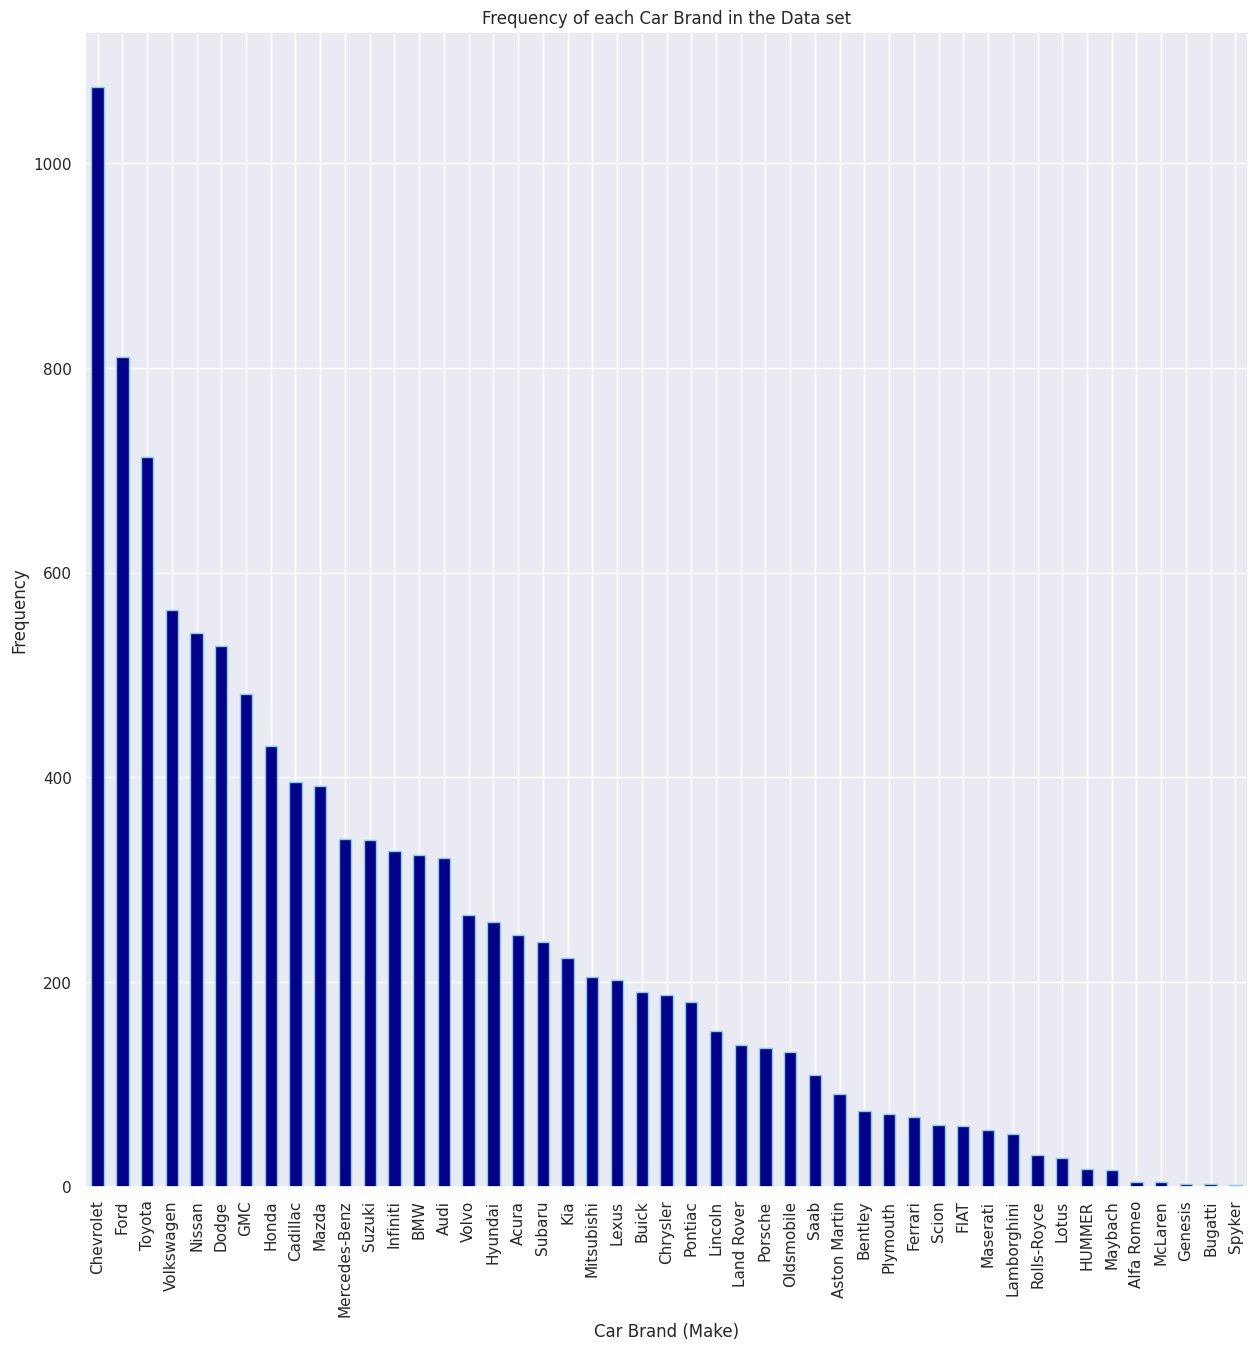

In [10]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

brand_counts = df['Make'].value_counts()

# Plot the bar chart
plt.figure(figsize=(15, 15))
brand_counts.plot(kind='bar', color='darkblue', edgecolor='skyblue')
plt.title('Frequency of each Car Brand in the Data set')
plt.xlabel('Car Brand (Make)')
plt.ylabel('Frequency')

plt.show()



# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

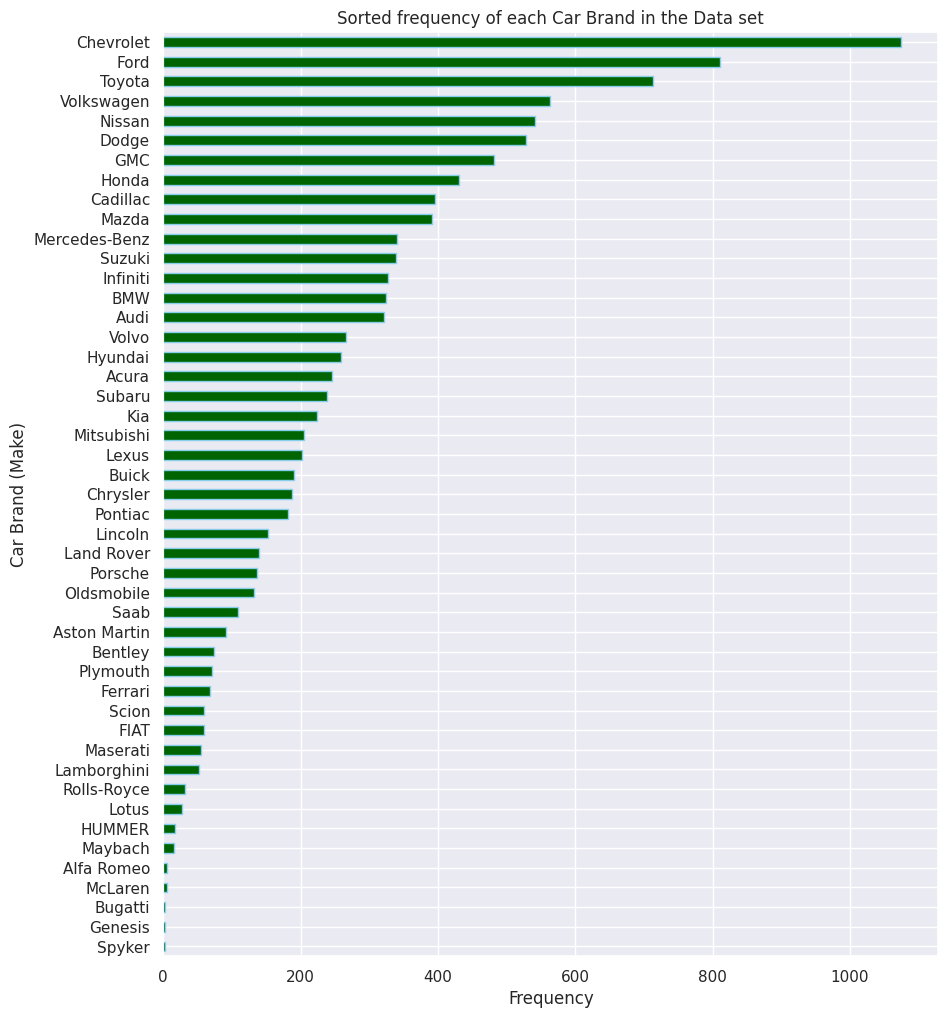

In [11]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

brand_counts = df['Make'].value_counts().sort_values(ascending=True)

# Plot the bar chart
plt.figure(figsize=(10, 12))
brand_counts.plot(kind='barh', color='darkgreen', edgecolor='skyblue')
plt.title('Sorted frequency of each Car Brand in the Data set')
plt.xlabel('Frequency')
plt.ylabel('Car Brand (Make)')

plt.show()




# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


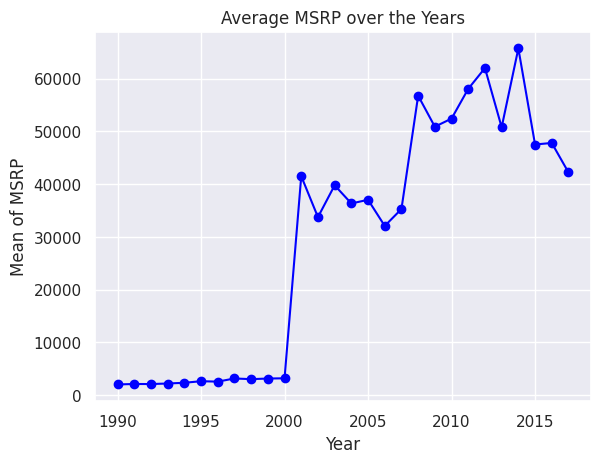

In [12]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.

mean_MSRP = df.groupby('Year')['MSRP'].mean()

plt.figure()
mean_MSRP.plot(kind='line', color='blue', marker='o')
plt.title('Average MSRP over the Years')
plt.xlabel('Year')
plt.ylabel('Mean of MSRP')
plt.show()


# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [13]:
# Make a column where is 10 when year is less than 2000, else 1.
df['adjusted_price']= np.where(df['Year']<=2000,df['MSRP']*10, df['MSRP'])



# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

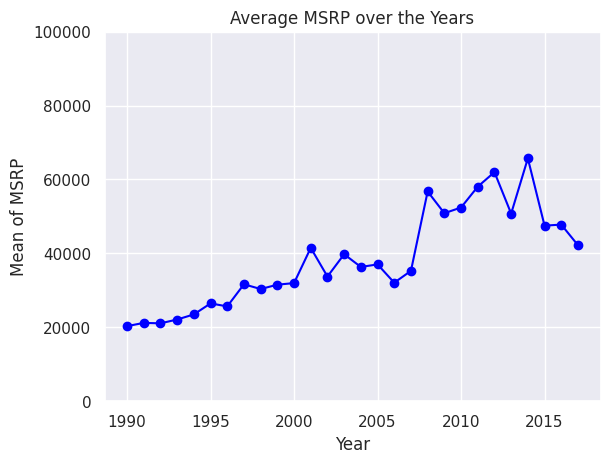

In [14]:
# Plot new prices
mean_MSRP = df.groupby('Year')['adjusted_price'].mean()

plt.figure()
mean_MSRP.plot(kind='line', color='blue', marker='o')
plt.title('Average MSRP over the Years')
plt.xlabel('Year')
plt.ylabel('Mean of MSRP')
plt.ylim(0,100000)
plt.grid(True)
plt.show()


# Plot the relationship between Engine HP and highway MPG

/tmp/ipykernel_28234/1103444748.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mpg_by_hp_bin = df.groupby('HP_bin')['highway MPG'].mean()


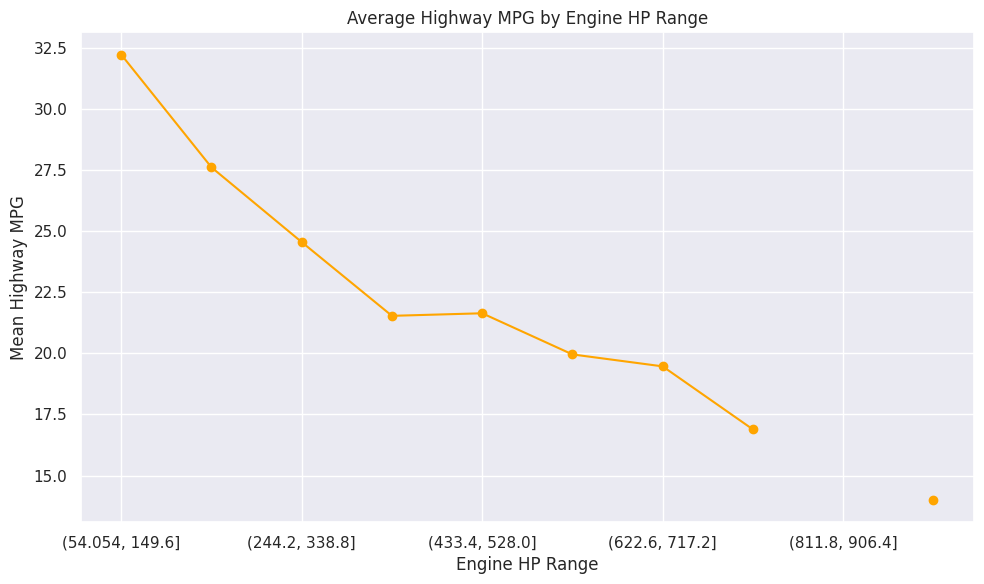

In [15]:
# Plot the relationship between Engine HP and highway MPG

# Bin Engine HP into ranges
df['HP_bin'] = pd.cut(df['Engine HP'], bins=10)

# Group by bin and calculate mean Highway MPG
mpg_by_hp_bin = df.groupby('HP_bin')['highway MPG'].mean()

# Plot as a line chart
plt.figure(figsize=(10, 6))
mpg_by_hp_bin.plot(kind='line', marker='o', color='orange')
plt.title('Average Highway MPG by Engine HP Range')
plt.xlabel('Engine HP Range')
plt.ylabel('Mean Highway MPG')
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to both Engine HP and Highway MPG
df = remove_outliers_iqr(df, 'Engine HP')
df = remove_outliers_iqr(df, 'highway MPG')


# Replot the relationship between Engine HP and highway MPG


/tmp/ipykernel_28234/1103444748.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mpg_by_hp_bin = df.groupby('HP_bin')['highway MPG'].mean()


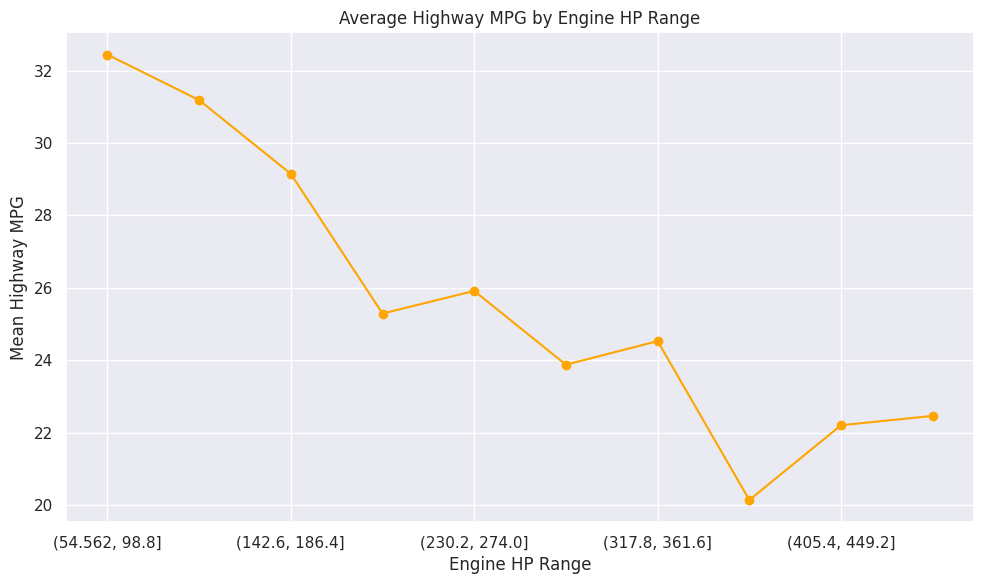

In [17]:
# Plot the relationship between Engine HP and highway MPG

# Bin Engine HP into ranges
df['HP_bin'] = pd.cut(df['Engine HP'], bins=10)

# Group by bin and calculate mean Highway MPG
mpg_by_hp_bin = df.groupby('HP_bin')['highway MPG'].mean()

# Plot as a line chart
plt.figure(figsize=(10, 6))
mpg_by_hp_bin.plot(kind='line', marker='o', color='orange')
plt.title('Average Highway MPG by Engine HP Range')
plt.xlabel('Engine HP Range')
plt.ylabel('Mean Highway MPG')
plt.grid(True)
plt.tight_layout()
plt.show()


# Make a scatter plot of Engine HP vs highway MPG

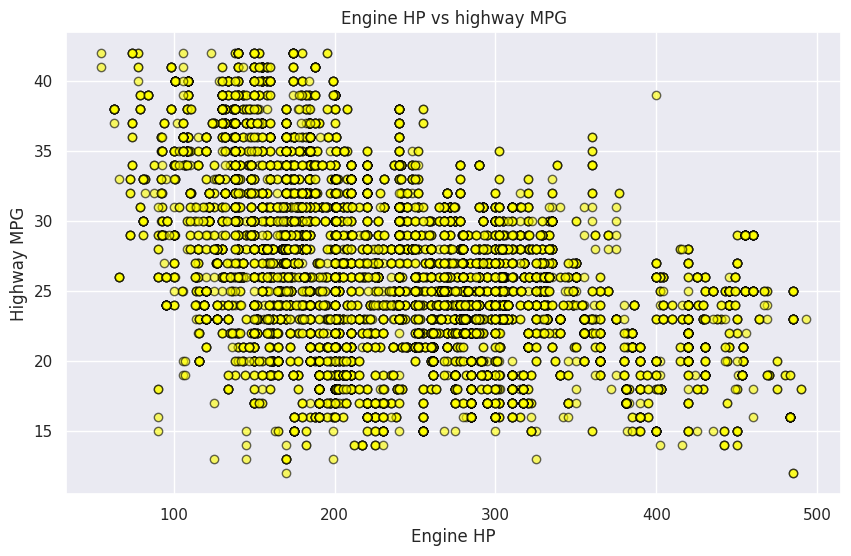

In [18]:
# Make a scatter plot of Engine HP vs highway MPG

plt.figure(figsize=(10, 6))
plt.scatter(df['Engine HP'], df['highway MPG'], alpha=0.6, color='yellow', edgecolors='black')
plt.title('Engine HP vs highway MPG')
plt.xlabel('Engine HP')
plt.ylabel('Highway MPG')
plt.grid(True)
plt.show()



# What does this plot tell you about how Engine HP affects highway MPG?

In [19]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('As the Engine HP increases, the highway MPG decreases. So, they are inversely proportional to each other')

As the Engine HP increases, the highway MPG decreases. So, they are inversely proportional to each other


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

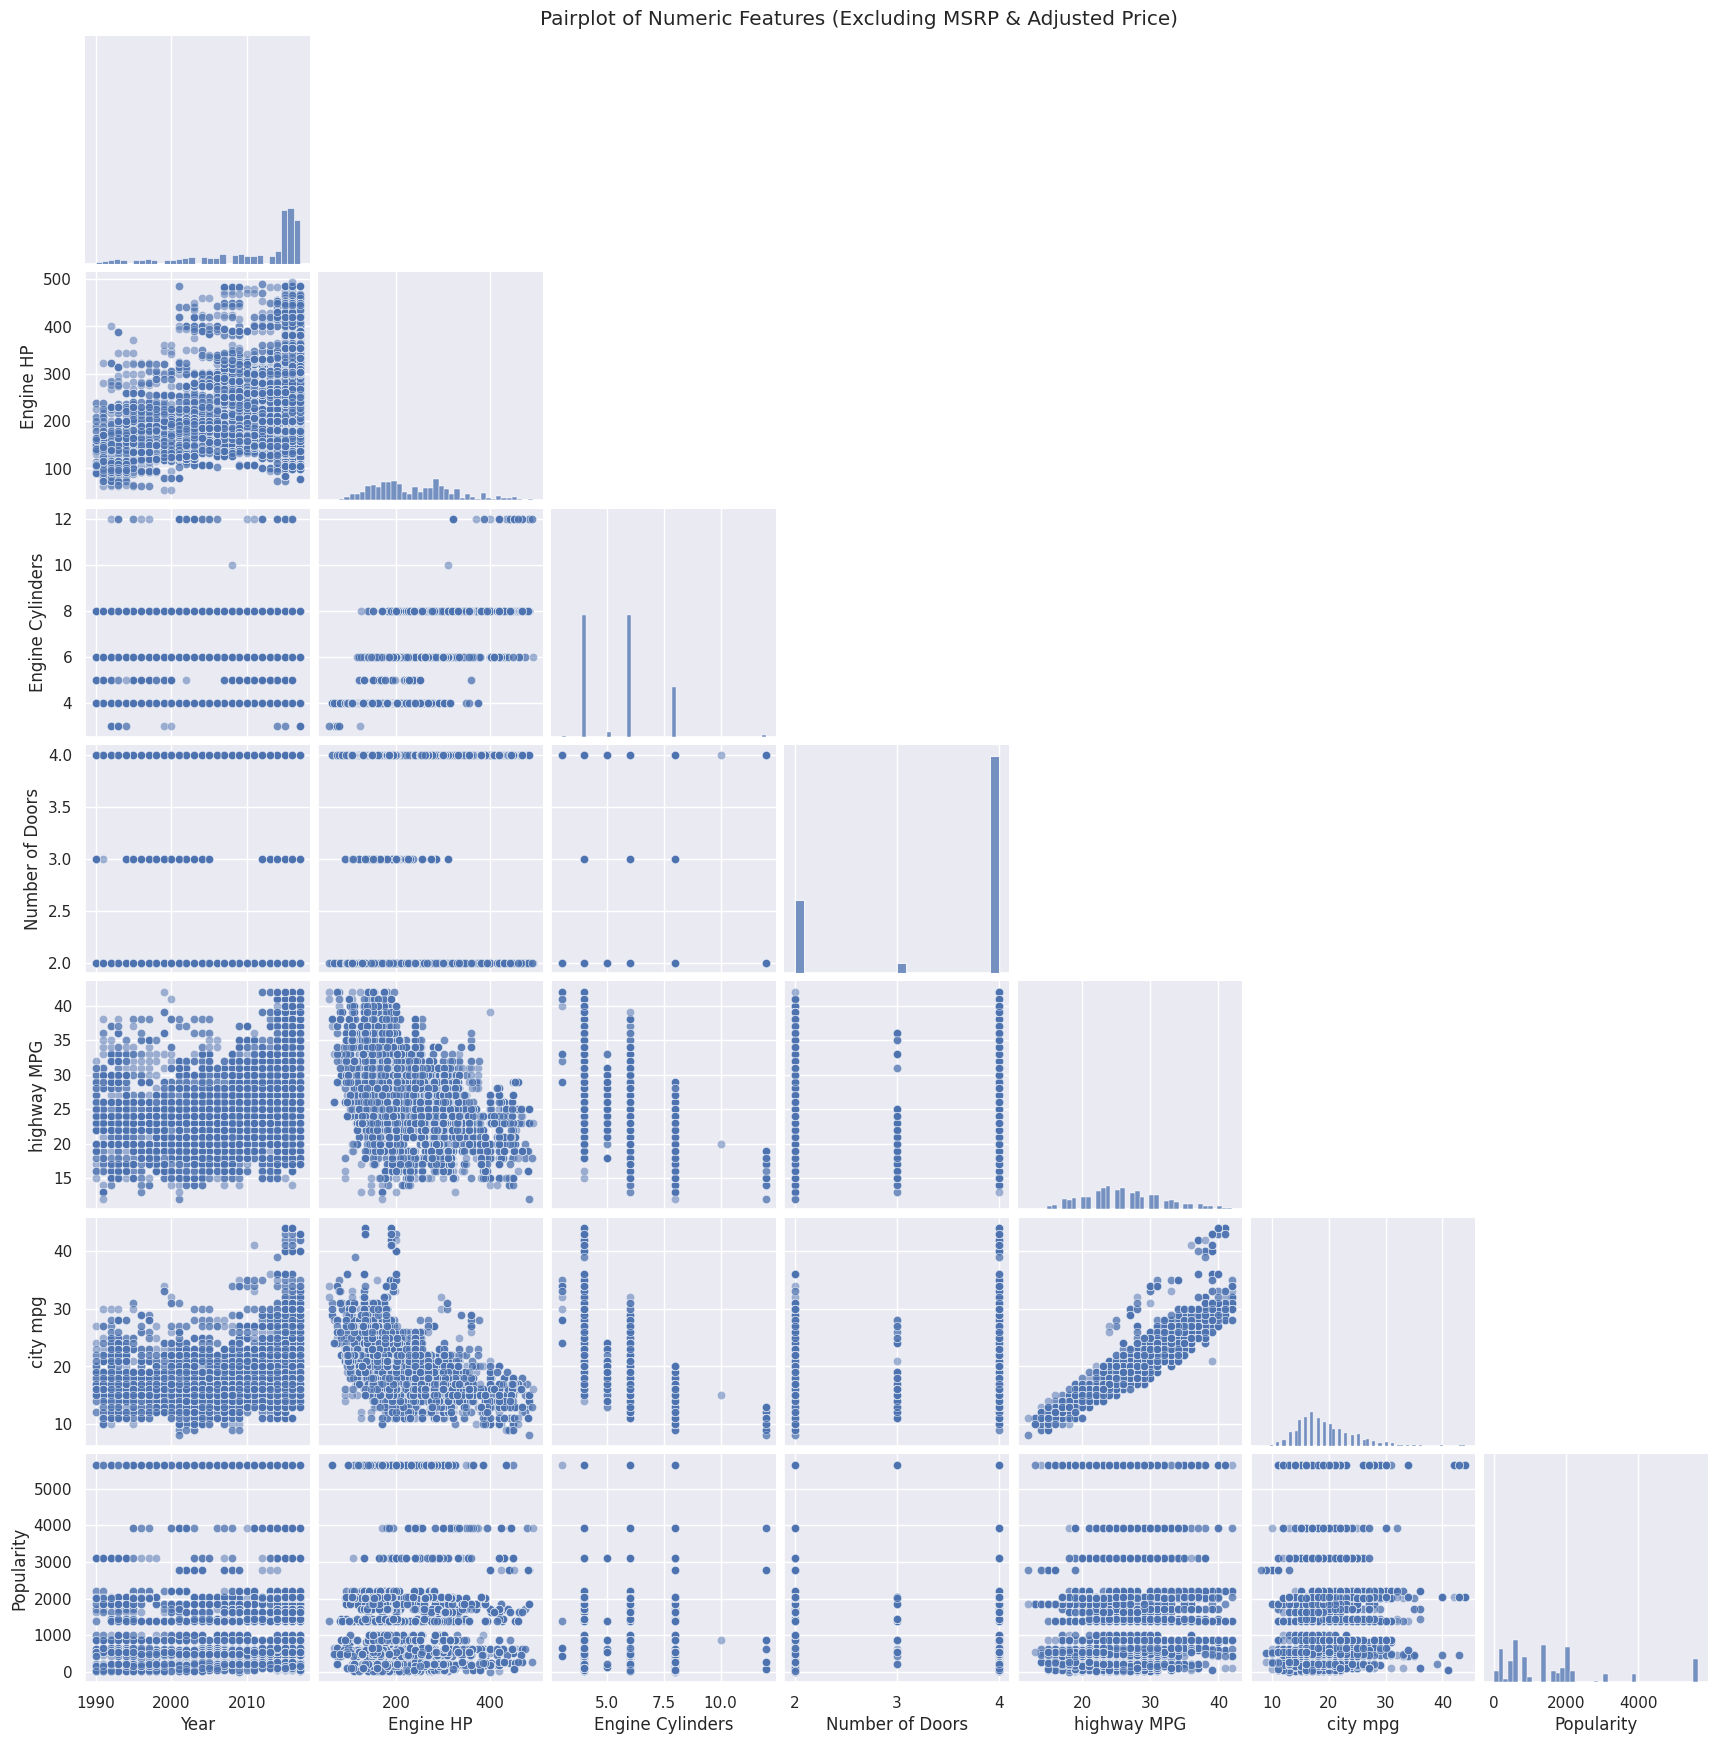

In [20]:
# Using a pairplot, display all of the linear relationship.

numeric_cols = df.select_dtypes(include='number').drop(columns=['MSRP', 'adjusted_price']).columns.to_list()

# Create the pairplot
sns.pairplot(df[numeric_cols], corner=True, plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Numeric Features (Excluding MSRP & Adjusted Price)', y=1)
plt.show()



In [21]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

print(df[numeric_cols].corr())


                      Year  Engine HP  Engine Cylinders  Number of Doors  \
Year              1.000000   0.376037         -0.069852         0.270154   
Engine HP         0.376037   1.000000          0.734636        -0.001118   
Engine Cylinders -0.069852   0.734636          1.000000        -0.051443   
Number of Doors   0.270154  -0.001118         -0.051443         1.000000   
highway MPG       0.332249  -0.462145         -0.705137         0.077427   
city mpg          0.282143  -0.536820         -0.726298         0.096369   
Popularity        0.090952   0.082125          0.089728        -0.065298   

                  highway MPG  city mpg  Popularity  
Year                 0.332249  0.282143    0.090952  
Engine HP           -0.462145 -0.536820    0.082125  
Engine Cylinders    -0.705137 -0.726298    0.089728  
Number of Doors      0.077427  0.096369   -0.065298  
highway MPG          1.000000  0.919652   -0.062250  
city mpg             0.919652  1.000000   -0.043116  
Popularity   

# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

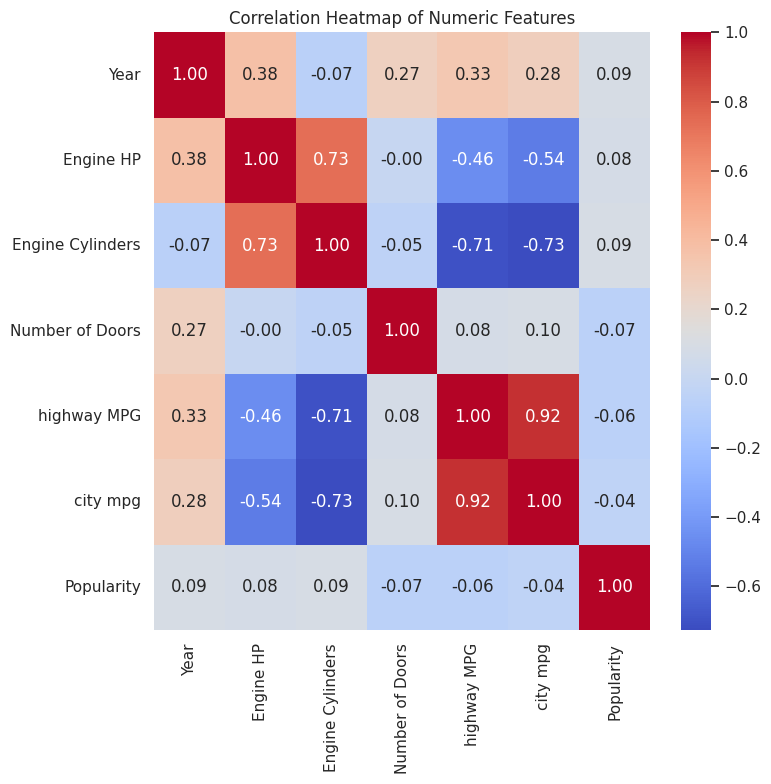

In [22]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


In [23]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Mostly with itself as it is 1 and then Engine Cylinders because the correlation is close to 1')

Mostly with itself as it is 1 and then Engine Cylinders because the correlation is close to 1


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 




In [24]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
